## Notebook made for debugging purposes only

In [1]:
# Import Libraries
from config_streaming import rigidBodyParts
import numpy as np
import pickle
import matplotlib.pyplot as plt



In [2]:
# Load game engine file from gamesave
with open("GameSaves/Ashwin_06_02__11_21_decoder_trial.pkl", 'rb') as file:
            oldGameEngine = pickle.load(file)



pygame 2.5.2 (SDL 2.28.3, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


(629, 2)


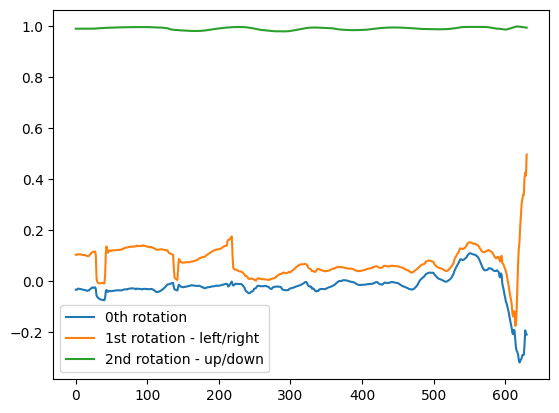

In [3]:
# Fetch hand rotations and cursor velocities
handPos1 = oldGameEngine.handPos1
handPos2 = oldGameEngine.handPos2
handPos3 = oldGameEngine.handPos3
cursorVelocity = oldGameEngine.cursorVelocityWriteDatastore

print(cursorVelocity.shape)
# # Plot the hand rotations
plt.plot(handPos1,label =  "0th rotation") 
plt.plot(handPos2,label =  "1st rotation - left/right") 
plt.plot(handPos3,label =  "2nd rotation - up/down") 
plt.legend()
plt.show()



In [4]:
rightHanddata = oldGameEngine.allBodyPartsDatastore[:,27,3:]

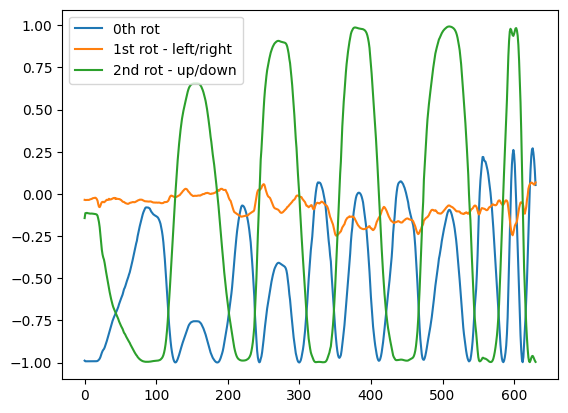

In [5]:
plt.plot(rightHanddata[:,0],label = "0th rot")
plt.plot(rightHanddata[:,1],label = "1st rot - left/right")
plt.plot(rightHanddata[:,2],label = "2nd rot - up/down")
plt.legend()

In [6]:
# Extract rotations from only simple body parts, the data here is offset corrected 
from config_streaming import simpleBodyParts


prinicipalBodyRotations = oldGameEngine.allBodyPartsDatastore[:,simpleBodyParts,3:]

prinicipalBodyRotations.shape
oldGameEngine.calibrationMatrix
# calibratedPBR = np.matmul(oldGameEngine.calibrationMatrix,prinicipalBodyRotations.transpose()).transpose()
# print(calibratedPBR[0:3],prinicipalBodyRotations[0:3])

array([[-0.98904301, -0.14762768,  0.        ],
       [ 0.14762768, -0.98904301,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

In [7]:


# Need to calibrate data to correct plane orientation
prinicipalBodyRotations = np.tensordot(oldGameEngine.calibrationMatrix,prinicipalBodyRotations.transpose(),axes = ([1],[0])).transpose() 

prinicipalBodyRotations = prinicipalBodyRotations[:,12,:]
# Normalise principle body rotations and extract correct bodies
# NEED TO MAKE THIS FUNCTION

        

In [8]:
prinicipalBodyRotations = prinicipalBodyRotations.reshape(-1,3)

In [9]:
rightHandData_calibrated = prinicipalBodyRotations

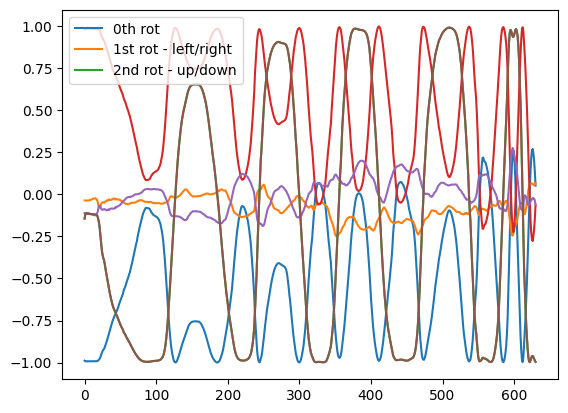

In [10]:
plt.plot(rightHanddata[:,0],label = "0th rot")
plt.plot(rightHanddata[:,1],label = "1st rot - left/right")
plt.plot(rightHanddata[:,2],label = "2nd rot - up/down")
plt.plot(rightHandData_calibrated)
plt.legend()